# Final Project - Analyzing US Unemployment Rates and Net Profit Margins of Target and Walmart (Portfolio Version)

This notebook condenses my original analysis into a narrative with code, plots, and descriptions based on my final analysis.

**Directory**
- **1. Data cleaning** Original datasets to cleaned tables (one full example; others summarized)
- **2. Exploratory analysis** (trends, dual-axis comparisons, distributions)
- **3. Descriptive statistics** (mean/median/std for key metrics)
- **4. Correlation analysis** (relationships between sales, margin, unemployment, etc.)

## 1. Data Cleaning (pandas)

Below is **one complete example** of how I cleaned an Excel file (sheet selection, column standardization, types).  
For the other two datasets, I followed the same steps, summarized here:
- Selected relevant sheets/columns
- Standardized column names and types
- Parsed dates and coerced numeric fields
- Merged on shared keys (e.g., Year, Company)

In [ ]:
# Walmart Data Cleaning
# Load the Excel file
file_path = "Walmart- Net Profit Margin.xlsx"
excel_data = pd.ExcelFile(file_path)

# Load the 'Calculation' sheet
df = excel_data.parse('Calculation')

# Drop columns that are completely NaN, and create a clean copy
df_cleaned = df.dropna(axis=1, how='all').copy()

# Strip whitespace from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Sort by date in ascending order
df_cleaned = df_cleaned.sort_values('Date').reset_index(drop=True)

# Save cleaned data to a new Excel file
df_cleaned.to_excel("Cleaned_Walmart_Net_Profit_Margin.xlsx", index=False)
print("Data cleaned and saved to 'Cleaned_Walmart_Net_Profit_Margin.xlsx'")

## 2. Descriptive Analysis
**2.1: Profit Margins v. Unemployment Rates**

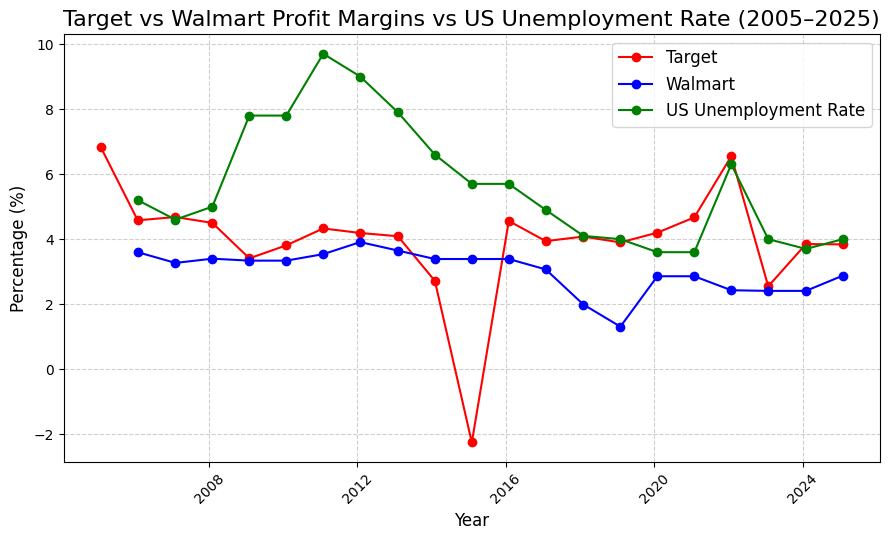

In [ ]:
# Rename columns for clarity in the plot
merged_df.rename(columns={
    'Net profit margin (%)_Target': 'Target Profit Margin (%)',
    'Net profit margin (%)_Walmart': 'Walmart Profit Margin (%)',
    'Unemployment Rate (%)': 'US Unemployment Rate (%)'
}, inplace=True)

# Plotting
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(merged_df['Date'], merged_df['Target Profit Margin (%)'],  label='Target',   color='red',   marker='o')
plt.plot(merged_df['Date'], merged_df['Walmart Profit Margin (%)'], label='Walmart',  color='blue',  marker='o')
plt.plot(merged_df['Date'], merged_df['US Unemployment Rate (%)'],  label='US Unemployment Rate', color='green', marker='o')

# Customize the plot
plt.title('Target vs Walmart Profit Margins vs US Unemployment Rate (2005–2025)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##  Key Insights and Inferences:

1. **Inverse Relationship:**
   - There is a visible **inverse trend**. When unemployment rises, profit margins (especially for Target) drop. This suggests a **correlation** where economic downturns directly reduce profitability.

2. **Walmart’s Resilience:**
   - Walmart shows **less sensitivity to unemployment**, which could be due to its **essential goods focus** (people shop at Walmart even during tough times).

3. **Target's Sensitivity:**
   - Target appears more affected by economic cycles, possibly because it balances **lifestyle** with **essential items**. This makes target more vulnerable to dips in consumer discretionary spending.

4. **Recovery Timelines:**
   - Profit margins don’t bounce back instantly when unemployment falls. There’s often a **lag**, showing that companies take time to recover even as economic conditions improve.


### 2.2: Dual-Axis Comparison & Volatility 
**Profit Margins v. Net Sales**

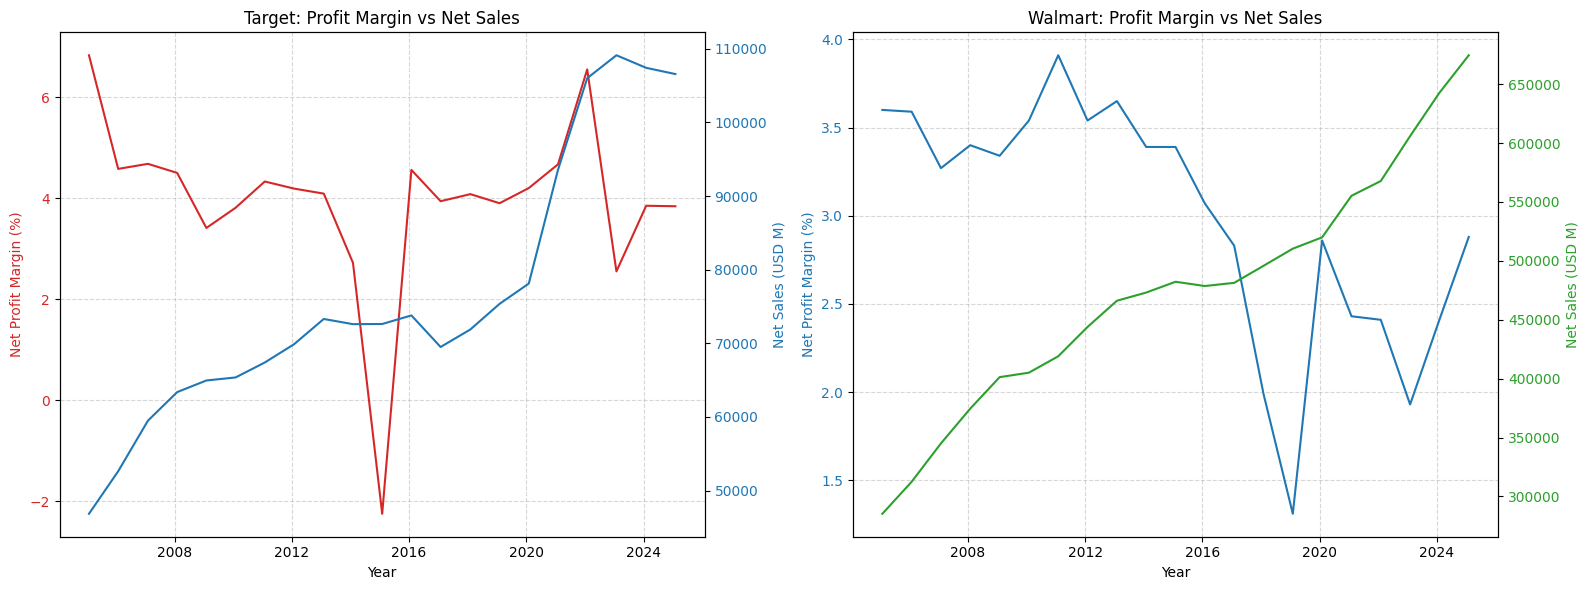

In [13]:
# Load the cleaned datasets
target_df = pd.read_excel("data/Cleaned_Target_Net_Profit_Margin.xlsx")
walmart_df = pd.read_excel("data/Cleaned_Walmart_Net_Profit_Margin.xlsx")
unemployment_df = pd.read_excel("data/Cleaned_US_Unemployment_Rate.xlsx")


# Convert Net Sales to numeric
target_df['Net Sales (USD M)'] = pd.to_numeric(target_df['Net Sales (USD M)'], errors='coerce')
walmart_df['Net sales (USD M)'] = pd.to_numeric(walmart_df['Net sales (USD M)'], errors='coerce')

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=False)

#Target subplot
color1 = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Profit Margin (%)', color=color1)
ax1.plot(target_df['Date'], target_df['Net profit margin (%)'], color=color1, label='Profit Margin')
ax1.tick_params(axis='y', labelcolor=color1)

# Twin axis for Target Net Sales
ax1b = ax1.twinx()
color2 = 'tab:blue'
ax1b.set_ylabel('Net Sales (USD M)', color=color2)
ax1b.plot(target_df['Date'], target_df['Net Sales (USD M)'], color=color2, label='Net Sales')
ax1b.tick_params(axis='y', labelcolor=color2)

ax1.set_title('Target: Profit Margin vs Net Sales')
ax1.grid(True, linestyle='--', alpha=0.5)

#Walmart subplot
color3 = 'tab:blue'
ax2.set_xlabel('Year')
ax2.set_ylabel('Net Profit Margin (%)', color=color3)
ax2.plot(walmart_df['Date'], walmart_df['Net profit margin (%)'], color=color3, label='Profit Margin')
ax2.tick_params(axis='y', labelcolor=color3)

# Twin axis for Walmart Net Sales
ax2b = ax2.twinx()
color4 = 'tab:green'
ax2b.set_ylabel('Net Sales (USD M)', color=color4)
ax2b.plot(walmart_df['Date'], walmart_df['Net sales (USD M)'], color=color4, label='Net Sales')
ax2b.tick_params(axis='y', labelcolor=color4)

ax2.set_title('Walmart: Profit Margin vs Net Sales')
ax2.grid(True, linestyle='--', alpha=0.5)

# Layout & show
plt.tight_layout()
plt.show()


**Inference of Dual-Axis Insight:**

**Target:** More **volatile margin trends vs steadily increasing sales**. There are years with rising sales but dropping margins, pointing to cost pressure or pricing changes.

**Walmart:** Sales and margins are both more **stable**. It reflects Walmart's cost leadership model, consistent with minimal fluctuation across economic cycles.

## 3. Descriptive Statistics

Summary statistics for key variables (e.g., Net Sales, Net Profit, Profit Margin).  

In [14]:
import numpy as np
import scipy.stats as stats

# Define helper function to compute and print stats
def print_summary_stats(df, company_name, margin_col, sales_col):
    print(f"\n--- {company_name} ---")

    # Clean and drop NA just in case
    df = df[[margin_col, sales_col]].dropna()

    for col in [margin_col, sales_col]:
        print(f"\n {col}:")
        print(f"Mean: {df[col].mean():.2f}")
        print(f"Median: {df[col].median():.2f}")
        print(f"Mode: {df[col].mode().values[0]:.2f}" if not df[col].mode().empty else "Mode: No mode found")
        print(f"Standard Deviation: {df[col].std():.2f}")
        print(f"Q1 (25th percentile): {df[col].quantile(0.25):.2f}")
        print(f"Q2 (50th percentile / Median): {df[col].quantile(0.50):.2f}")
        print(f"Q3 (75th percentile): {df[col].quantile(0.75):.2f}")

# Apply for both datasets
print_summary_stats(target_df, "Target", "Net profit margin (%)", "Net Sales (USD M)")
print_summary_stats(walmart_df, "Walmart", "Net profit margin (%)", "Net sales (USD M)")



--- Target ---

 Net profit margin (%):
Mean: 3.95
Median: 4.09
Mode: -2.25
Standard Deviation: 1.73
Q1 (25th percentile): 3.84
Q2 (50th percentile / Median): 4.09
Q3 (75th percentile): 4.56

 Net Sales (USD M):
Mean: 76175.33
Median: 72596.00
Mode: 46839.00
Standard Deviation: 18030.13
Q1 (25th percentile): 65357.00
Q2 (50th percentile / Median): 72596.00
Q3 (75th percentile): 78112.00

--- Walmart ---

 Net profit margin (%):
Mean: 2.99
Median: 3.27
Mode: 2.41
Standard Deviation: 0.68
Q1 (25th percentile): 2.43
Q2 (50th percentile / Median): 3.27
Q3 (75th percentile): 3.54

 Net sales (USD M):
Mean: 473318.10
Median: 478614.00
Mode: 285222.00
Standard Deviation: 101932.15
Q1 (25th percentile): 405046.00
Q2 (50th percentile / Median): 478614.00
Q3 (75th percentile): 519926.00


## 4. Correlation Analysis

**Correlation coefficients and heatmaps identify meaningful relationships (direction/strength).**
**Used to determine whether macroeconomic conditions significantly affect these retailers's porfitability**

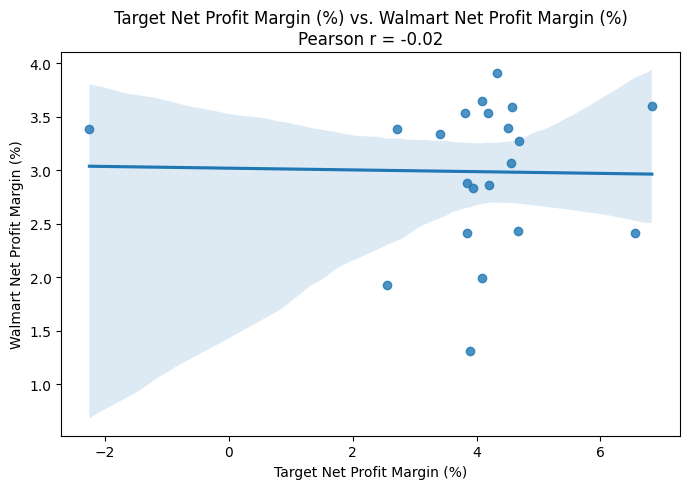

Correlation between Target Net Profit Margin (%) and Walmart Net Profit Margin (%): -0.02


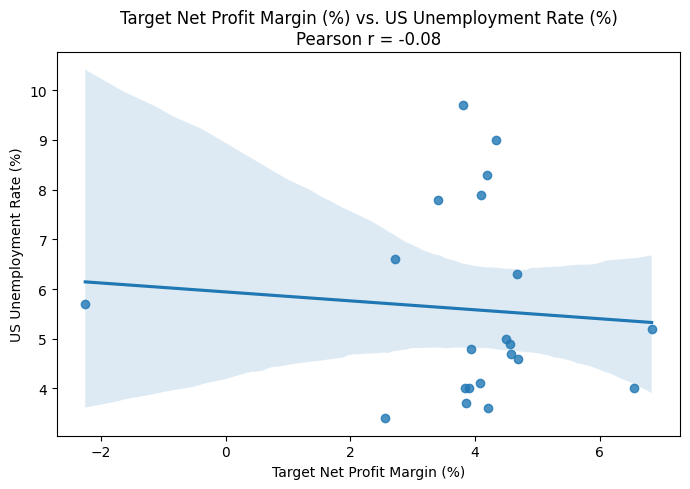

Correlation between Target Net Profit Margin (%) and US Unemployment Rate (%): -0.08


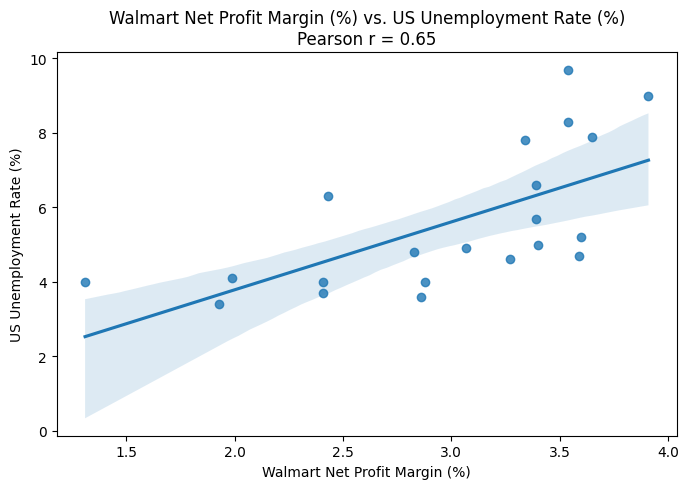

Correlation between Walmart Net Profit Margin (%) and US Unemployment Rate (%): 0.65


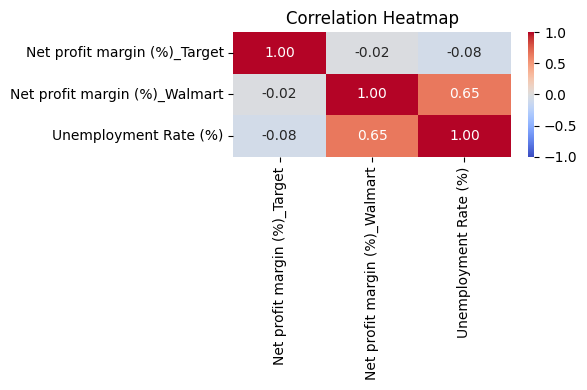


Correlation matrix:
                                Net profit margin (%)_Target  \
Net profit margin (%)_Target                       1.000000   
Net profit margin (%)_Walmart                     -0.020548   
Unemployment Rate (%)                             -0.081284   

                               Net profit margin (%)_Walmart  \
Net profit margin (%)_Target                       -0.020548   
Net profit margin (%)_Walmart                       1.000000   
Unemployment Rate (%)                               0.649971   

                               Unemployment Rate (%)  
Net profit margin (%)_Target               -0.081284  
Net profit margin (%)_Walmart               0.649971  
Unemployment Rate (%)                       1.000000  


In [15]:
# Correlation Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load cleaned datasets
target_df  = pd.read_excel("data/Cleaned_Target_Net_Profit_Margin.xlsx")
walmart_df = pd.read_excel("data/Cleaned_Walmart_Net_Profit_Margin.xlsx")
unemp_df   = pd.read_excel("data/Cleaned_US_Unemployment_Rate.xlsx")

# Light cleanup (for error encountered)
for df in (target_df, walmart_df, unemp_df):
    df.columns = df.columns.str.strip()                    # removes extra spaces
    if "Date" in df.columns:                               # ensures Year exists
        df["Year"] = pd.to_datetime(df["Date"]).dt.year


# Merge on Year
if all("Year" in d.columns for d in (target_df, walmart_df, unemp_df)):
    merged = (
        target_df.merge(
            walmart_df, on="Year", suffixes=("_Target", "_Walmart")
        )
        .merge(unemp_df, on="Year")
    )
else:
    raise ValueError("Expected a 'Year' column in all three dataframes before merging.")

# Identify the column names
target_col  = "Net profit margin (%)_Target"
walmart_col = "Net profit margin (%)_Walmart"
unemp_col   = "Unemployment Rate (%)"

# scatterplot + correlation
def scatter_with_corr(x, y, data, xlabel, ylabel):
    plt.figure(figsize=(7, 5))
    sns.regplot(x=x, y=y, data=data)
    r, _ = pearsonr(data[x], data[y])
    plt.title(f"{xlabel} vs. {ylabel}\nPearson r = {r:.2f}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()
    print(f"Correlation between {xlabel} and {ylabel}: {r:.2f}")

# Pairwise relationships
scatter_with_corr(target_col, walmart_col, merged,
                  "Target Net Profit Margin (%)",
                  "Walmart Net Profit Margin (%)")

scatter_with_corr(target_col, unemp_col, merged,
                  "Target Net Profit Margin (%)",
                  "US Unemployment Rate (%)")

scatter_with_corr(walmart_col, unemp_col, merged,
                  "Walmart Net Profit Margin (%)",
                  "US Unemployment Rate (%)")

# Correlation heatmap
heatmap_cols = [target_col, walmart_col, unemp_col]
corr_matrix = merged[heatmap_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

print("\nCorrelation matrix:\n", corr_matrix)


## Conclusion (condensed)
- **Walmart's** profit margins show a somewhat favorable relationship with unemployment and less sensitivity to unemployment changes. 
- **Target's** profit margins exhibit higher volatility and no correlation with unemployment rates.